In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("clean_startup_data.csv")
df['country_code'].nunique()

122

In [3]:
df['status'].value_counts()

,count
status,
operating,33205
acquired,3735
closed,3092
ipo,990


In [4]:
df['primary_category'].nunique()

697

In [5]:
total_startups = len(df)

total_failed = df['failed'].sum()

failure_rate = (total_failed / total_startups) * 100

avg_funding = df['funding_total_usd'].mean()

avg_survival = df['startup_age_years'].mean()


In [6]:
total_failed,total_failed,failure_rate,avg_funding,avg_survival

(np.int64(3092),
 np.int64(3092),
 np.float64(7.537418945931451),
 np.float64(11903025.339004455),
 np.float64(17.128662668811856))

In [7]:
industry_failure = (
    df.groupby('primary_category')['failed']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
industry_failure

,failed
primary_category,
Speech Recognition,1.0
B2B Express Delivery,1.0
Anything Capital Intensive,1.0
Subscription Businesses,1.0
SNS,1.0
Smart Grid,1.0
Senior Citizens,1.0
Self Development,1.0
Q&A,1.0


In [8]:
funding_status = (
    df.groupby('status')['funding_total_usd']
    .median()
    .sort_values(ascending=False)
)
funding_status

,funding_total_usd
status,
ipo,28214983.0
acquired,10000000.0
operating,1500000.0
closed,890588.5


In [9]:
country_analysis = (
    df.groupby('country_code')
    .agg(
        total_startups=('name', 'count'),
        failure_rate=('failed', 'mean'),
        avg_funding=('funding_total_usd', 'median')
    )
    .sort_values('total_startups', ascending=False)
)
country_analysis

,total_startups,failure_rate,avg_funding
country_code,,,
USA,25125,0.066945,2758222.0
Unknown,2432,0.194490,400000.0
GBR,2391,0.067336,1234208.0
CAN,1232,0.075487,1507803.5
IND,957,0.042842,1220000.0
...,...,...,...
RWA,1,0.000000,131000.0
PRY,1,0.000000,25000.0
SOM,1,1.000000,2000000.0


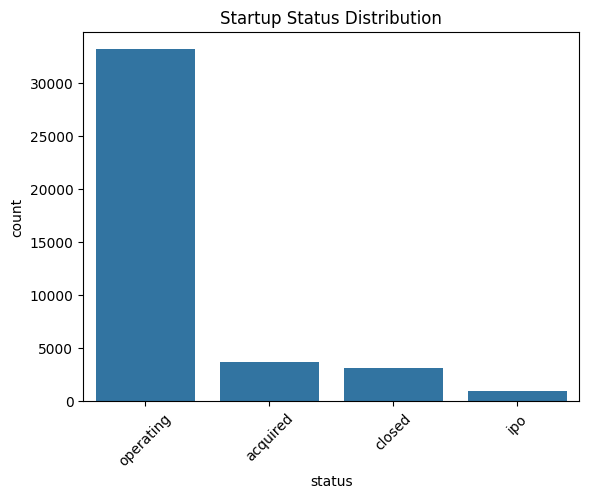

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='status')
plt.xticks(rotation=45)
plt.title("Startup Status Distribution")
plt.show()

The majority of startups in the dataset are currently operating, while a smaller proportion have been acquired or closed, and IPO exits are relatively rare — indicating that successful public exits are uncommon compared to continued operations or acquisitions.

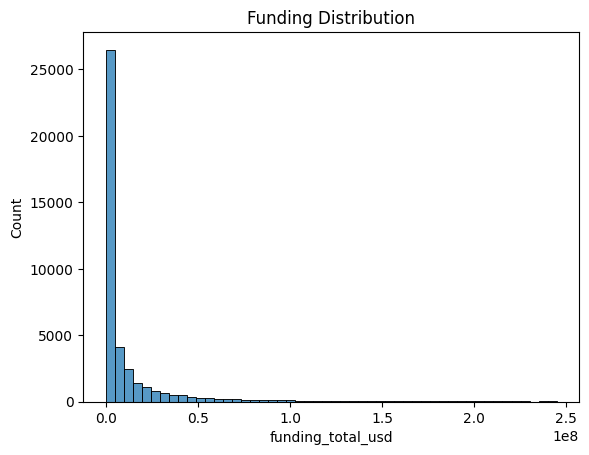

In [11]:
sns.histplot(df['funding_total_usd'], bins=50)
plt.title("Funding Distribution")
plt.show()

The funding distribution is highly right-skewed, with the majority of startups receiving relatively low funding amounts, while a small number of startups secure extremely high investments, creating a long tail of outliers.

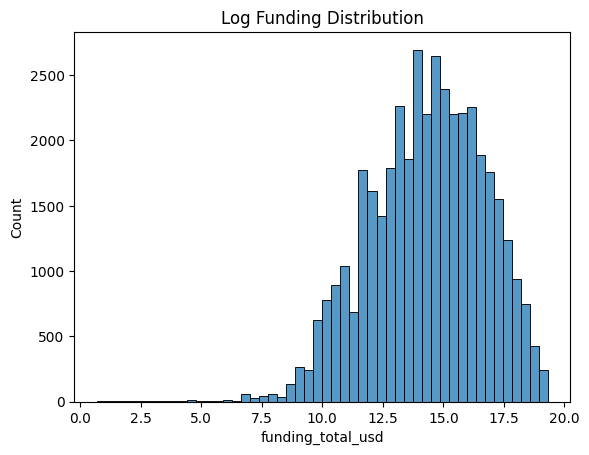

In [13]:
sns.histplot(np.log1p(df['funding_total_usd']), bins=50)
plt.title("Log Funding Distribution")
plt.show()

After applying log transformation, the funding distribution appears approximately normal, indicating that the original skewness was driven by extreme high-value outliers.

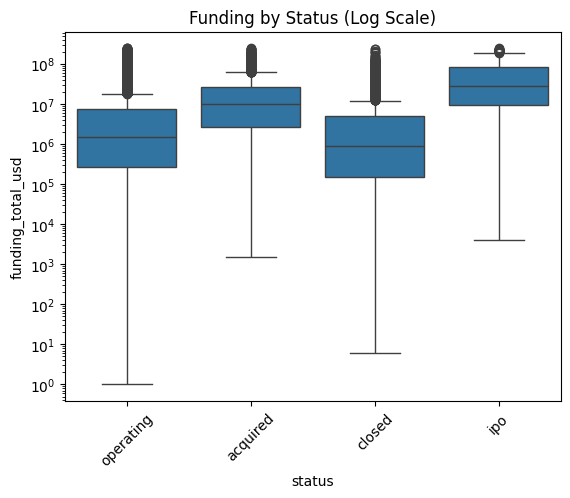

In [12]:
sns.boxplot(data=df, x='status', y='funding_total_usd')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Funding by Status (Log Scale)")
plt.show()

IPO startups exhibit the highest median funding levels, followed by acquired startups, while closed startups tend to have significantly lower median funding, suggesting a strong association between higher funding and successful exits.

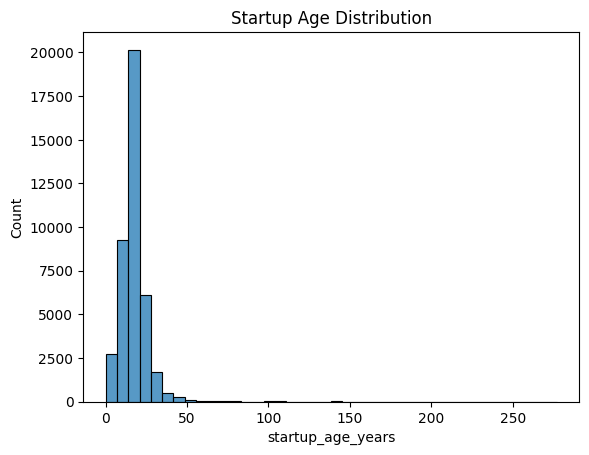

In [14]:
sns.histplot(df['startup_age_years'], bins=40)
plt.title("Startup Age Distribution")
plt.show()

Most startups appear to operate within a relatively short lifespan, with survival heavily concentrated below 30 years, suggesting that long-term sustainability is relatively uncommon in the startup ecosystem.

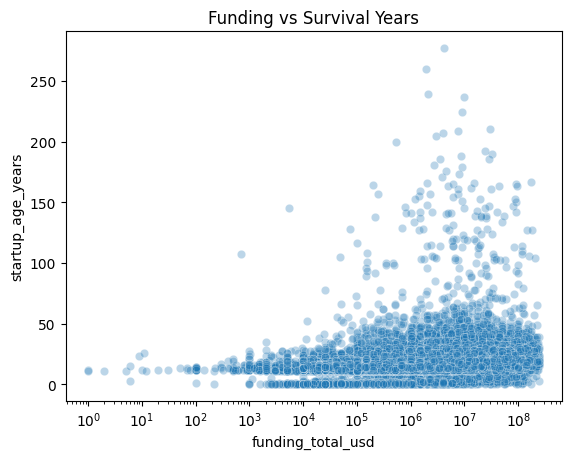

In [15]:
sns.scatterplot(
    data=df,
    x='funding_total_usd',
    y='startup_age_years',
    alpha=0.3
)
plt.xscale('log')
plt.title("Funding vs Survival Years")
plt.show()

While startups with very low funding generally cluster in lower survival years, higher-funded ventures exhibit a broader survival range, indicating that funding may contribute to longevity but does not guarantee long-term survival.

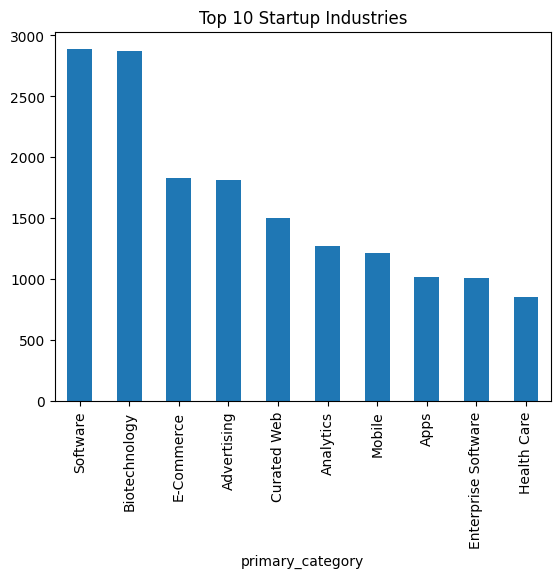

In [16]:
top_industries = df['primary_category'].value_counts().head(10)

top_industries.plot(kind='bar')
plt.title("Top 10 Startup Industries")
plt.show()

Software and Biotechnology dominate the startup landscape, followed by E-Commerce and Advertising, indicating strong concentration of ventures in technology-driven sectors.

In [20]:
industry_stats = (
    df.groupby('primary_category')
    .agg(
        total_startups=('name', 'count'),
        failure_rate=('failed', 'mean')
    )
)

# Keep industries with at least 50 startups
industry_stats = industry_stats[industry_stats['total_startups'] >= 50]

industry_stats.sort_values('failure_rate', ascending=False).head(10)

,total_startups,failure_rate
primary_category,,
Coupons,67,0.253731
Public Relations,94,0.223404
Facebook Applications,79,0.189873
Search,114,0.175439
Curated Web,1504,0.170213
Social Media,317,0.141956
Application Platforms,141,0.141844
Messaging,191,0.136126
Services,74,0.135135


In [22]:
industry_stats = (
    df.groupby('primary_category')
    .agg(
        total_startups=('name', 'count'),
        failure_rate=('failed', 'mean')
    )
)

industry_stats = industry_stats[industry_stats['total_startups'] >= 50]
top_failure = industry_stats.sort_values('failure_rate', ascending=False).head(10)


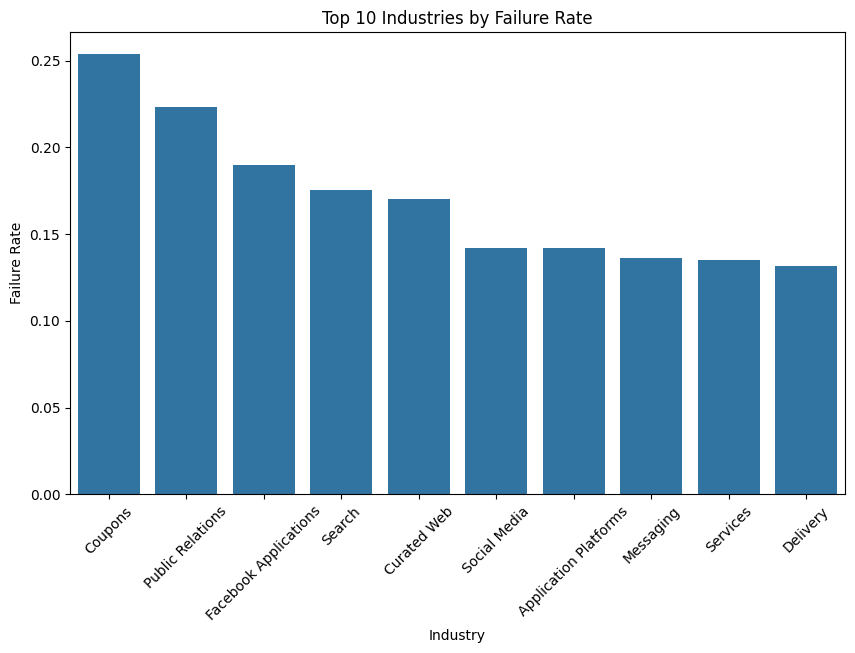

In [23]:
plt.figure(figsize=(10,6))

sns.barplot(
    x=top_failure.index,
    y=top_failure['failure_rate']
)

plt.xticks(rotation=45)
plt.ylabel("Failure Rate")
plt.xlabel("Industry")
plt.title("Top 10 Industries by Failure Rate")

plt.show()


Among industries with significant startup representation, Coupons and Public Relations exhibit the highest failure rates, while Delivery, Services, and Messaging show comparatively lower failure proportions.

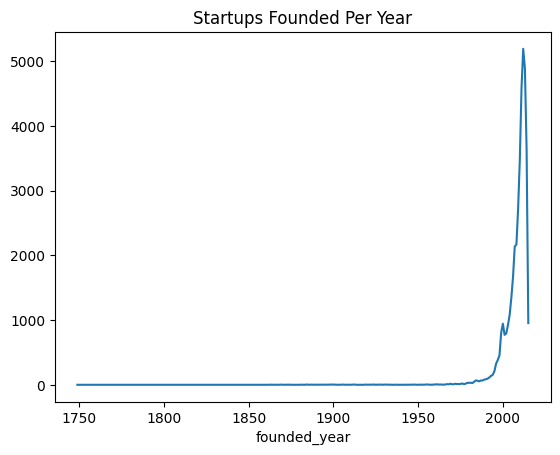

In [18]:
yearly_startups = df['founded_year'].value_counts().sort_index()

yearly_startups.plot()
plt.title("Startups Founded Per Year")
plt.show()

Startup formation remained relatively low and stable until the late 20th century, followed by a sharp exponential increase after the 1990s, with a peak in the 2010s.

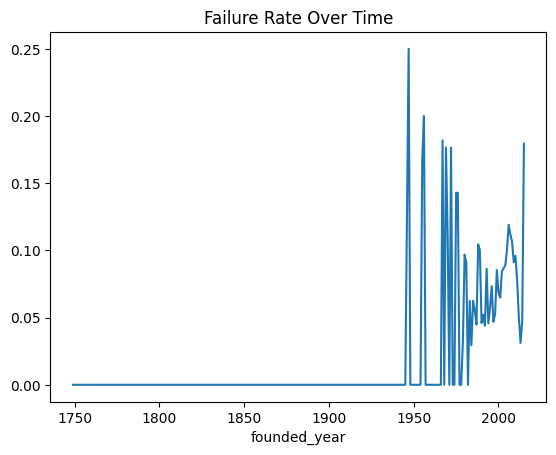

In [19]:
failure_trend = (
    df.groupby('founded_year')['failed']
    .mean()
)

failure_trend.plot()
plt.title("Failure Rate Over Time")
plt.show()

Failure rates appear volatile in earlier decades due to low startup counts, while more recent years show relatively stable failure proportions with moderate fluctuations.